<h2>Importing libraries</h2>
Now we're going to add some libraries for feature extraction

In [3]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#Keras

<h2>Dataset creating</h2>
CSV file's header:

In [3]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
#header += ' label'
header = header.split()

Let's extract some features

It's a long process - don't run it without strong necessary

(file <i>dataset.csv</i> has already included

In [4]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

    for filename in os.listdir(f'./Set1/WAV'):
        songname = f'./Set1/WAV/{filename}'
        y, sr = librosa.load(songname, mono=True)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'

        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

<h2>Preprocessing dataset</h2>

In [19]:
librosaData = pd.read_csv('dataset.csv')
filenames = librosaData['filename']
librosaData.drop(['filename'],axis=1, inplace=True)
librosaData.head()

scalerLibrosa = MinMaxScaler()
librosa_scaled = scalerLibrosa.fit_transform(X=librosaData)
print(librosa_scaled)

[[0.29926651 0.39636038 0.43454645 ... 0.36500164 0.43707843 0.26305436]
 [0.41483731 0.25797481 0.18791351 ... 0.36184949 0.35707246 0.25367657]
 [0.2735686  0.36639974 0.20800106 ... 0.29598113 0.37759518 0.28601648]
 ...
 [0.46097794 0.03848778 0.31892101 ... 0.46856052 0.45728931 0.38224898]
 [0.34460025 0.05330734 0.3236992  ... 0.38210133 0.34405289 0.27723581]
 [0.11556431 0.07617007 0.18826291 ... 0.69541127 0.59639437 0.3171378 ]]


<h2>Clustering into groups</h2>

In [20]:
n_clusters = 12
clusters = KMeans(n_clusters=n_clusters, random_state=0).fit(librosa_scaled)
clusters.labels_

array([ 2,  4,  4, 10,  1,  4,  4, 11,  1,  2,  1,  1,  2,  1,  1, 11,  1,
        5,  1, 10,  8,  1,  2,  2, 10,  5,  0,  1, 10,  7,  4,  5,  5,  4,
       11,  4,  4, 10, 10,  1,  5,  4, 11,  4,  4,  2, 11,  5,  5,  5, 11,
        1,  4,  5,  1,  2,  4, 10,  5, 10,  5,  4,  3, 11,  3,  5,  4,  3,
        4,  2, 11,  5,  2,  7,  2, 11,  2,  2,  4,  5,  5,  4,  2, 11,  4,
        3,  5,  7, 11,  8,  9, 10,  4,  6,  8,  4,  0,  8,  2, 10,  4,  2,
        0,  2,  8, 11,  7,  0,  8,  9,  1,  6,  0,  9,  4,  8,  4,  4,  7,
       10,  1,  9,  9,  2,  0,  0,  9,  9,  9,  9,  1,  2,  1,  1,  1,  9,
        8, 10, 10,  8,  2,  8,  1, 10,  4,  2,  4,  1,  4,  4,  4,  4, 10,
        0, 11,  9, 11,  9,  9,  2,  6,  9,  5, 10,  1,  5,  4, 10,  9,  1,
        6,  8,  8,  1,  2, 11,  4,  1,  6,  7, 10,  2,  2,  1,  1,  3, 10,
        2,  2,  3,  2,  1, 10,  1, 11,  2,  4,  0,  9, 10,  2,  1,  1,  2,
        2,  0,  1,  2,  2,  2,  8,  9,  4,  1,  5,  4,  0,  2,  8,  8,  9,
        8,  0,  8,  8,  9

<h2>Decreasing feature size for visualisation</h2>

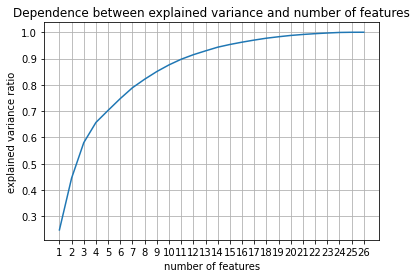

In [21]:
pca = PCA(n_components=3)

plotGroups = pca.fit_transform(librosa_scaled)
centers = pca.transform(clusters.cluster_centers_)
#print(pca.explained_variance_ratio_)

expVar = []
for i in range(1, 27):
    pca1 = PCA(n_components=i)
    pca1.fit_transform(librosa_scaled)
    expVar.append(pca1.explained_variance_ratio_.sum())
plt.plot(range(1, 27), expVar)
plt.xticks(range(1,27))
plt.xlabel('number of features')
plt.ylabel('explained variance ratio')
plt.title('Dependence between explained variance and number of features')
plt.grid(True)

<h2>2d visualisation</h2>

Text(0.5, 1.0, 'created clusters')

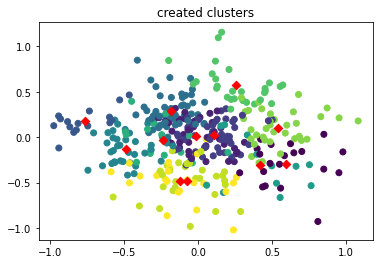

In [22]:
plt.scatter(plotGroups[:,0], plotGroups[:,1], c=clusters.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color = 'red')
plt.title('created clusters')

<h2>3d visualisation</h2>

In [24]:
#Make Plotly figure
import plotly
import plotly.graph_objs as go

fig1 = go.Scatter3d(x=plotGroups[:,0],
                    y=plotGroups[:,1],
                    z=plotGroups[:,2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                size=5,
                                color=clusters.labels_,
                                #colorscale = 'HSV',
                                line=dict (width=1)),
                    text=filenames,
                    line=dict (width=5),
                    mode='markers')

fig2 = go.Scatter3d(x=centers[:,0],
                    y=centers[:,1],
                    z=centers[:,2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                size=8,
                                color=list(range(1,n_clusters+1)),
                                #colorscale = 'IceFire',
                                line=dict(width=10)),
                    text=list(range(1,n_clusters+1)),

                    mode='markers')
#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict(title="1 feature"),
                                yaxis=dict(title="2 feature"),
                                zaxis=dict(title="3 feature")),)

#Plot and save html
plotly.offline.plot({"data": [fig1, fig2],
                     "layout": mylayout},
                     auto_open=True,
                     filename="3DPlot.html")



'3DPlot.html'

<h2>Correlation between pre-annotated values and cluster's labels</h2

In [14]:
#encoding words into numbers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

pre_annotated = pd.read_csv('set1_tracklist.csv')
annotated_classes = encoder.fit_transform(pre_annotated['Emotion'])

np.corrcoef(annotated_classes, clusters.labels_)

array([[1.       , 0.0805609],
       [0.0805609, 1.       ]])

As we can see there is a very weak correlation between pre-annotated values and calculated cluster's classes